<a href="https://colab.research.google.com/github/Bino-01/Air-Line-Passengers/blob/master/Copy_of_CO2_ARIMA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
air = pd.read_csv('/content/co2.csv')
air

,0
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


In [ ]:
# Remaining Columns
air.columns=['co2']
air

,co2
0,315.58
1,316.39
2,316.79
3,317.82
4,318.39
...,...
343,347.54
344,346.20
345,346.20
346,347.44


In [ ]:
# Looking for null values
air.isnull().sum()


,0
co2,0


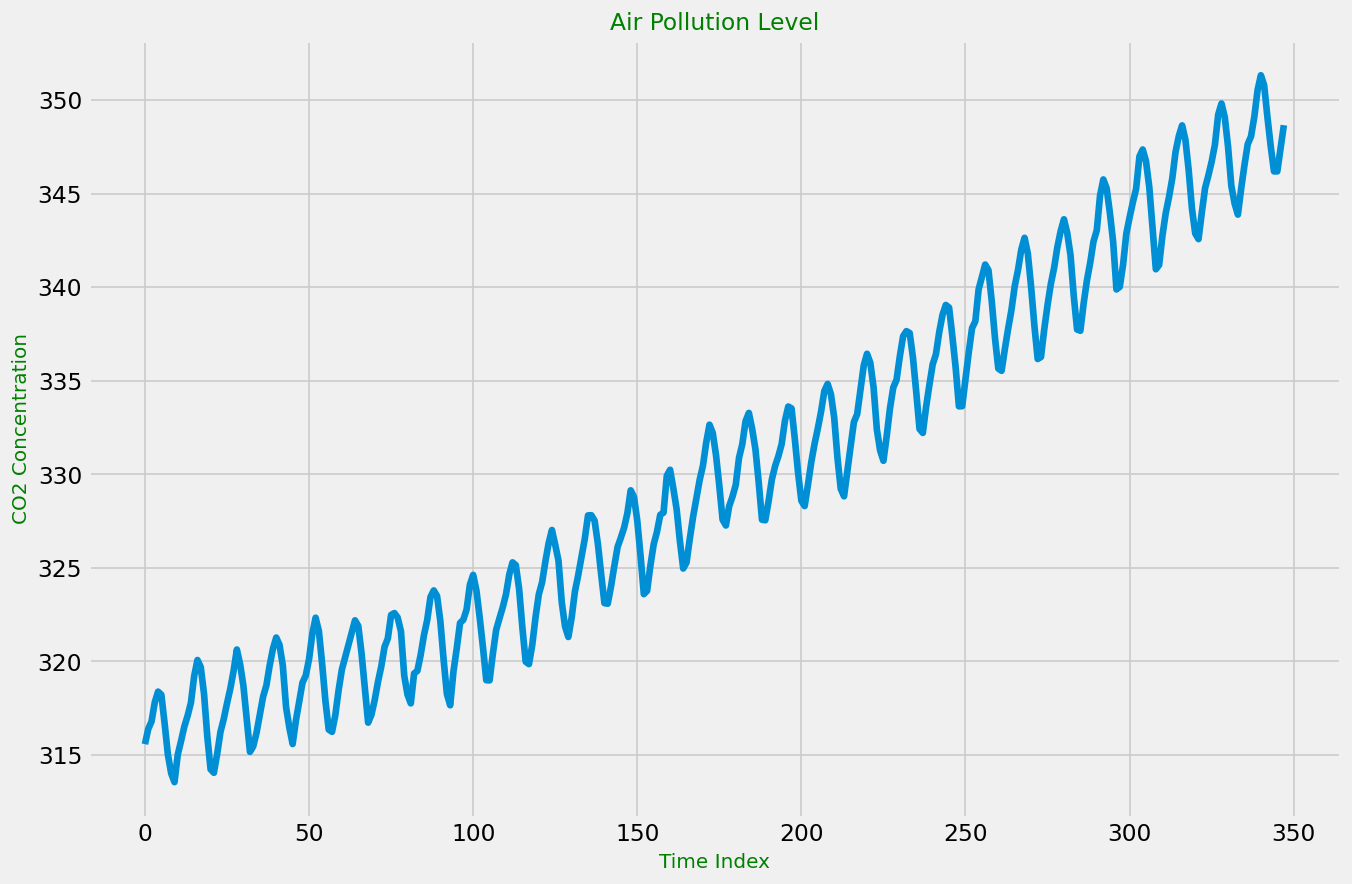

In [ ]:
# Plotting the TS
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8), dpi=120)
plt.xlabel('Time Index', color = 'green', fontsize=12)
plt.ylabel('CO2 Concentration', color = 'green', fontsize=12)
plt.title('Air Pollution Level', color = 'green', fontsize=14)
plt.plot(air)
plt.show()

In [ ]:
# ADF and KPSS Test
from statsmodels.tsa.stattools import adfuller, kpss
adf_test = adfuller(air['co2'])
print('ADF Test: p-value = %f' % adf_test[1]) # The value obtained below ADF p-value >0.05 ===> TS non-stationary

kpss_test = kpss(air['co2'])
print('KPSS Test: p-value = %f' % kpss_test[1]) # The value obtained below KPSS p-value < 0.05 ===> TS non-stationary

ADF Test: p-value = 1.000000
KPSS Test: p-value = 0.010000


/tmp/ipython-input-3933309899.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(air['co2'])


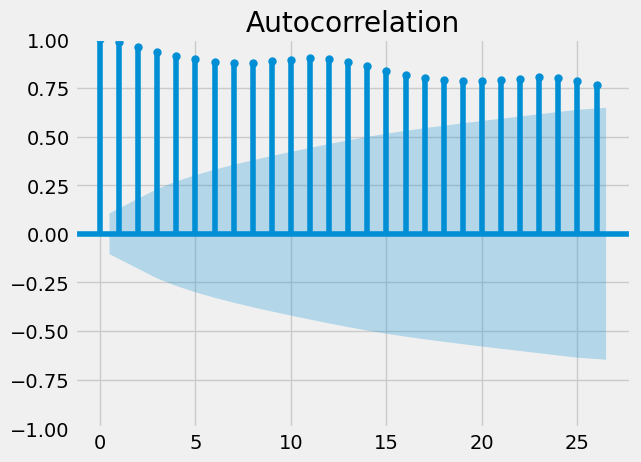

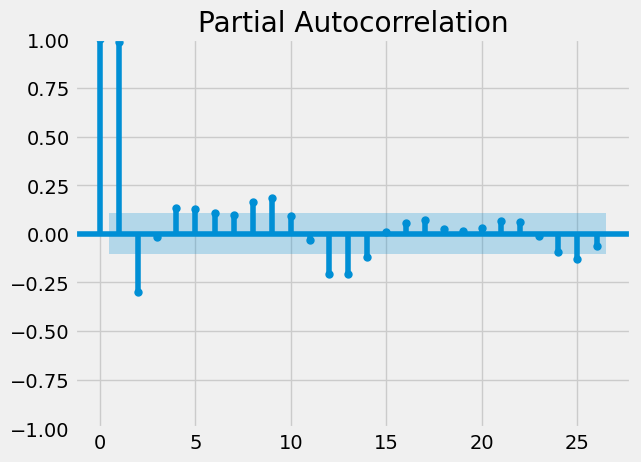

In [ ]:
# Let's Plot the ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(air), plot_pacf(air)
plt.show()
"""
1- For ACF many lags are significant, therefore q = 0, 1, 2, 3, ..
2- For PACF many lags are significant, therefore p = 0, 1, 2, 3, ..
NB: We will not need to go beyond 3 for both ACF (q) and PACF (p)
"""

<Figure size 1200x800 with 0 Axes>

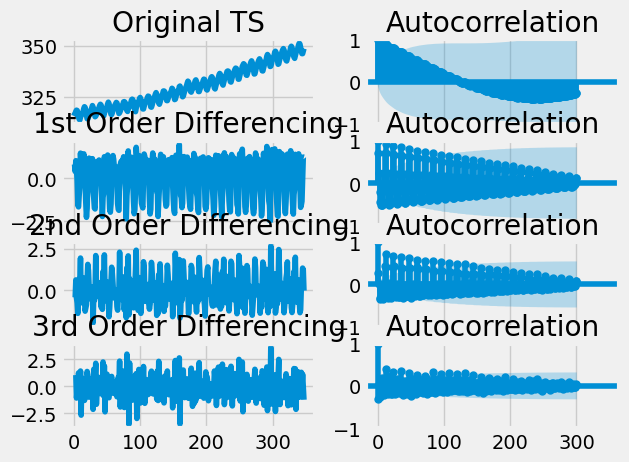

'\nThe 1st order shows that the TS is stationary and d = 1\n'

In [ ]:
from matplotlib import axes
# Let's Determine the value of d by implementing the differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,8), dpi=100)

# Original TS
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(air); axes[0, 0].set_title('Original TS')
plot_acf(air, lags = 300, ax=axes[0, 1])

# 1st Order Differencing
axes[1, 0].plot(air.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(air.diff().dropna(), lags = 300, ax=axes[1, 1])

# 2nd Order Differencing
axes[2, 0].plot(air.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(air.diff().diff().dropna(), lags = 300, ax=axes[2, 1])

# 3rd Order Differencing
axes[3, 0].plot(air.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(air.diff().diff().diff().dropna(), lags = 300, ax=axes[3, 1])

plt.show()

"""
The 1st order shows that the TS is stationary and d = 1
"""

In [ ]:
# Selecting the best ARIMA model using AIC and BIC, the smaller their value the better, where
# AIC will tell us if the model fit the dataset and BIC will inform about the model complexity
# Therefore, using both will be a trade-off between model best-fit and complexity
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(air, order=(0,1,1))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  348
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -442.920
Date:                Thu, 08 Jan 2026   AIC                            889.839
Time:                        00:36:33   BIC                            897.538
Sample:                             0   HQIC                           892.905
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6562      0.044     14.864      0.000       0.570       0.743
sigma2         0.7508      0.075      9.981      0.000       0.603       0.898
===================================================================================
Ljung-Box (L1) (Q):                  30.35   Jarque-Bera (JB):                10.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.23
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 2- ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(air, order=(1,1,0))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  348
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -427.101
Date:                Thu, 08 Jan 2026   AIC                            858.201
Time:                        00:37:28   BIC                            865.900
Sample:                             0   HQIC                           861.266
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7059      0.043     16.558      0.000       0.622       0.789
sigma2         0.6851      0.063     10.813      0.000       0.561       0.809
===================================================================================
Ljung-Box (L1) (Q):                  42.16   Jarque-Bera (JB):                 5.79
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.13   Skew:                             0.16
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 3rd ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(air, order=(1,1,1))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  348
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -403.784
Date:                Thu, 08 Jan 2026   AIC                            813.568
Time:                        00:38:23   BIC                            825.116
Sample:                             0   HQIC                           818.166
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5730      0.060      9.482      0.000       0.455       0.691
ma.L1          0.3545      0.067      5.287      0.000       0.223       0.486
sigma2         0.5986      0.052     11.436      0.000       0.496       0.701
===================================================================================
Ljung-Box (L1) (Q):                   2.38   Jarque-Bera (JB):                 3.91
Prob(Q):                              0.12   Prob(JB):                         0.14
Heteroskedasticity (H):               1.04   Skew:                             0.20
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 4th ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(air, order=(2,1,1))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  348
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -335.983
Date:                Thu, 08 Jan 2026   AIC                            679.967
Time:                        00:39:00   BIC                            695.364
Sample:                             0   HQIC                           686.098
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5393      0.033     46.721      0.000       1.475       1.604
ar.L2         -0.8368      0.036    -23.398      0.000      -0.907      -0.767
ma.L1         -0.8202      0.044    -18.786      0.000      -0.906      -0.735
sigma2         0.4033      0.029     13.924      0.000       0.347       0.460
===================================================================================
Ljung-Box (L1) (Q):                   1.77   Jarque-Bera (JB):                10.24
Prob(Q):                              0.18   Prob(JB):                         0.01
Heteroskedasticity (H):               1.07   Skew:                             0.42
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 5th ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(air, order=(1,1,2))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  348
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -384.523
Date:                Thu, 08 Jan 2026   AIC                            777.046
Time:                        00:40:00   BIC                            792.443
Sample:                             0   HQIC                           783.176
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4102      0.086      4.743      0.000       0.241       0.580
ma.L1          0.5407      0.085      6.395      0.000       0.375       0.706
ma.L2          0.3927      0.069      5.669      0.000       0.257       0.528
sigma2         0.5352      0.046     11.741      0.000       0.446       0.625
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):                 3.19
Prob(Q):                              0.36   Prob(JB):                         0.20
Heteroskedasticity (H):               1.08   Skew:                             0.20
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 7th ARIMA modelfrom statsmodels.tsa.arima.model import ARIMA
model = ARIMA(air, order=(2,1,2))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    co2   No. Observations:                  348
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -335.957
Date:                Thu, 08 Jan 2026   AIC                            681.914
Time:                        00:40:43   BIC                            701.160
Sample:                             0   HQIC                           689.577
                                - 348                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5435      0.044     34.784      0.000       1.457       1.630
ar.L2         -0.8408      0.049    -17.060      0.000      -0.937      -0.744
ma.L1         -0.8344      0.079    -10.602      0.000      -0.989      -0.680
ma.L2          0.0135      0.089      0.152      0.880      -0.162       0.189
sigma2         0.4032      0.031     13.217      0.000       0.343       0.463
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):                10.28
Prob(Q):                              0.25   Prob(JB):                         0.01
Heteroskedasticity (H):               1.07   Skew:                             0.42
Prob(H) (two-sided):                  0.70   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Comparing several ARIMA models
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA

# Example candidate models (add/remove as needed)
orders = [(0,1,1), (1,1,0), (1,1,1), (2,1,1), (1,1,2), (2,1,2), (3,1,1), (1,1,3), (3,1,3)]

for order in orders:
    try:
        model = ARIMA(air, order=order)   # <-- 'air' is your Series
        fit = model.fit()
        print(f"ARIMA{order}: AIC={fit.aic:.3f}, BIC={fit.bic:.3f}")
    except Exception as e:
        print(f"ARIMA{order} failed: {e}")


ARIMA(0, 1, 1): AIC=889.839, BIC=897.538
ARIMA(1, 1, 0): AIC=858.201, BIC=865.900
ARIMA(1, 1, 1): AIC=813.568, BIC=825.116
ARIMA(2, 1, 1): AIC=679.967, BIC=695.364
ARIMA(1, 1, 2): AIC=777.046, BIC=792.443
ARIMA(2, 1, 2): AIC=681.914, BIC=701.160
ARIMA(3, 1, 1): AIC=681.917, BIC=701.163
ARIMA(1, 1, 3): AIC=759.257, BIC=778.504
ARIMA(3, 1, 3): AIC=742.389, BIC=769.334


In [ ]:
# Let's Implement a SARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(air, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                co2   No. Observations:                  348
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -65.936
Date:                            Thu, 08 Jan 2026   AIC                            141.872
Time:                                    00:48:03   BIC                            160.943
Sample:                                         0   HQIC                           149.475
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3482      0.121      2.866      0.004       0.110       0.586
ma.L1         -0.6661      0.099     -6.728      0.000      -0.860      -0.472
ar.S.L12       0.0219      0.061      0.360      0.719      -0.097       0.141
ma.S.L12      -0.8713      0.039    -22.589      0.000      -0.947      -0.796
sigma2         0.0825      0.007     12.102      0.000       0.069       0.096
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.48   Prob(JB):                         0.66
Heteroskedasticity (H):               0.90   Skew:                             0.00
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# 2nd SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(air, order=(2,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
model_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                co2   No. Observations:                  348
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -64.071
Date:                            Thu, 08 Jan 2026   AIC                            140.142
Time:                                    00:50:29   BIC                            163.027
Sample:                                         0   HQIC                           149.266
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4544      0.127      3.588      0.000       0.206       0.703
ar.L2          0.1351      0.081      1.669      0.095      -0.024       0.294
ma.L1         -0.8045      0.120     -6.694      0.000      -1.040      -0.569
ar.S.L12       0.0256      0.061      0.419      0.675      -0.094       0.146
ma.S.L12      -0.8699      0.041    -21.400      0.000      -0.950      -0.790
sigma2         0.0816      0.007     11.853      0.000       0.068       0.095
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.22
Prob(Q):                              0.98   Prob(JB):                         0.54
Heteroskedasticity (H):               0.89   Skew:                             0.00
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""